# ML Project 6033657523 - Cleaning Data

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [5]:
dataset = pd.read_csv(r'Raw Data/Flight_prices.csv')
dataset.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [6]:
df = dataset.drop('Unnamed: 0', axis=1)
df = df.drop("flight", axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [13]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
df.shape

(300153, 10)

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_40652\2910226726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'], y=df['price'], palette='hls')


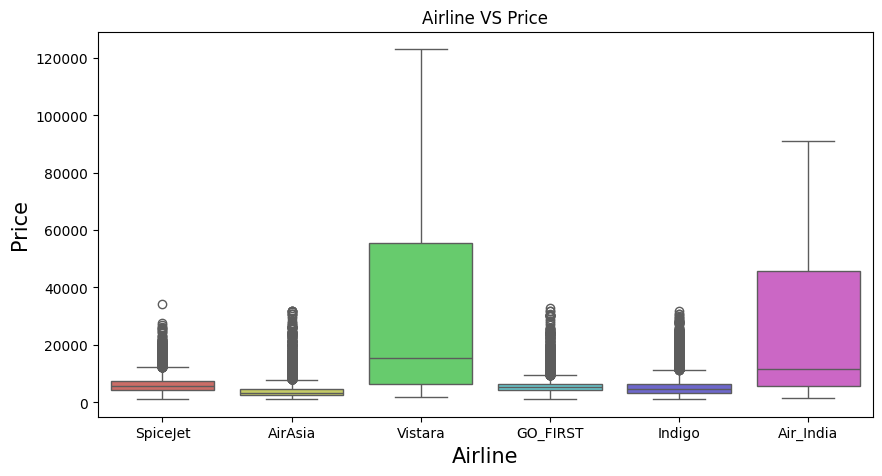

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['airline'], y=df['price'], palette='hls')
plt.title('Airline VS Price')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_40652\3794863343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['class'], y=df['price'], palette='hls')


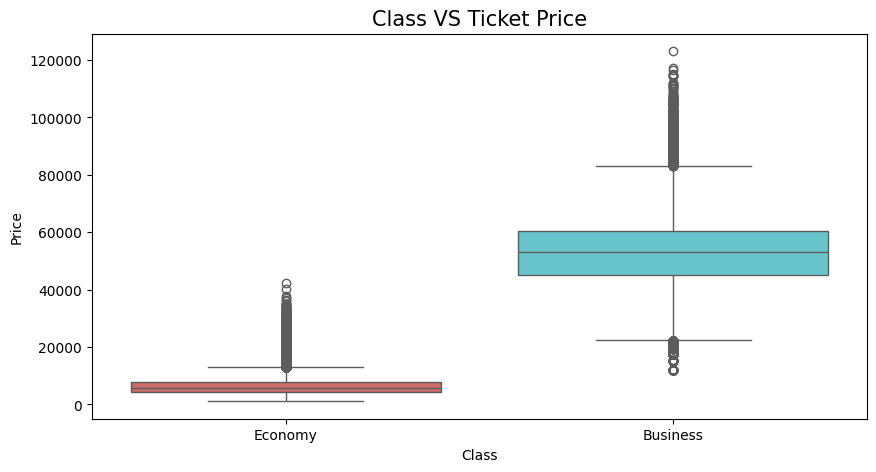

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['class'], y=df['price'], palette='hls')
plt.title('Class VS Ticket Price', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_40652\2039889736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['stops'], y=df['price'], palette='hls')


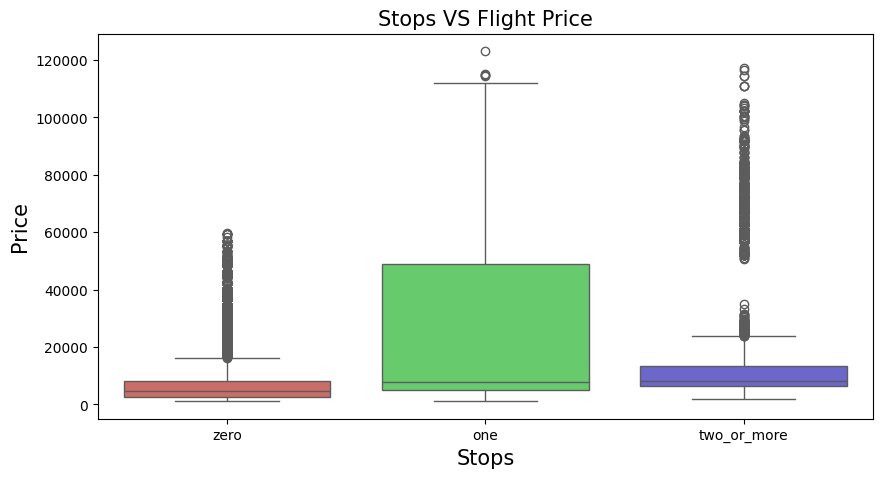

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['stops'], y=df['price'], palette='hls')
plt.title("Stops VS Flight Price", fontsize=15)
plt.xlabel("Stops", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

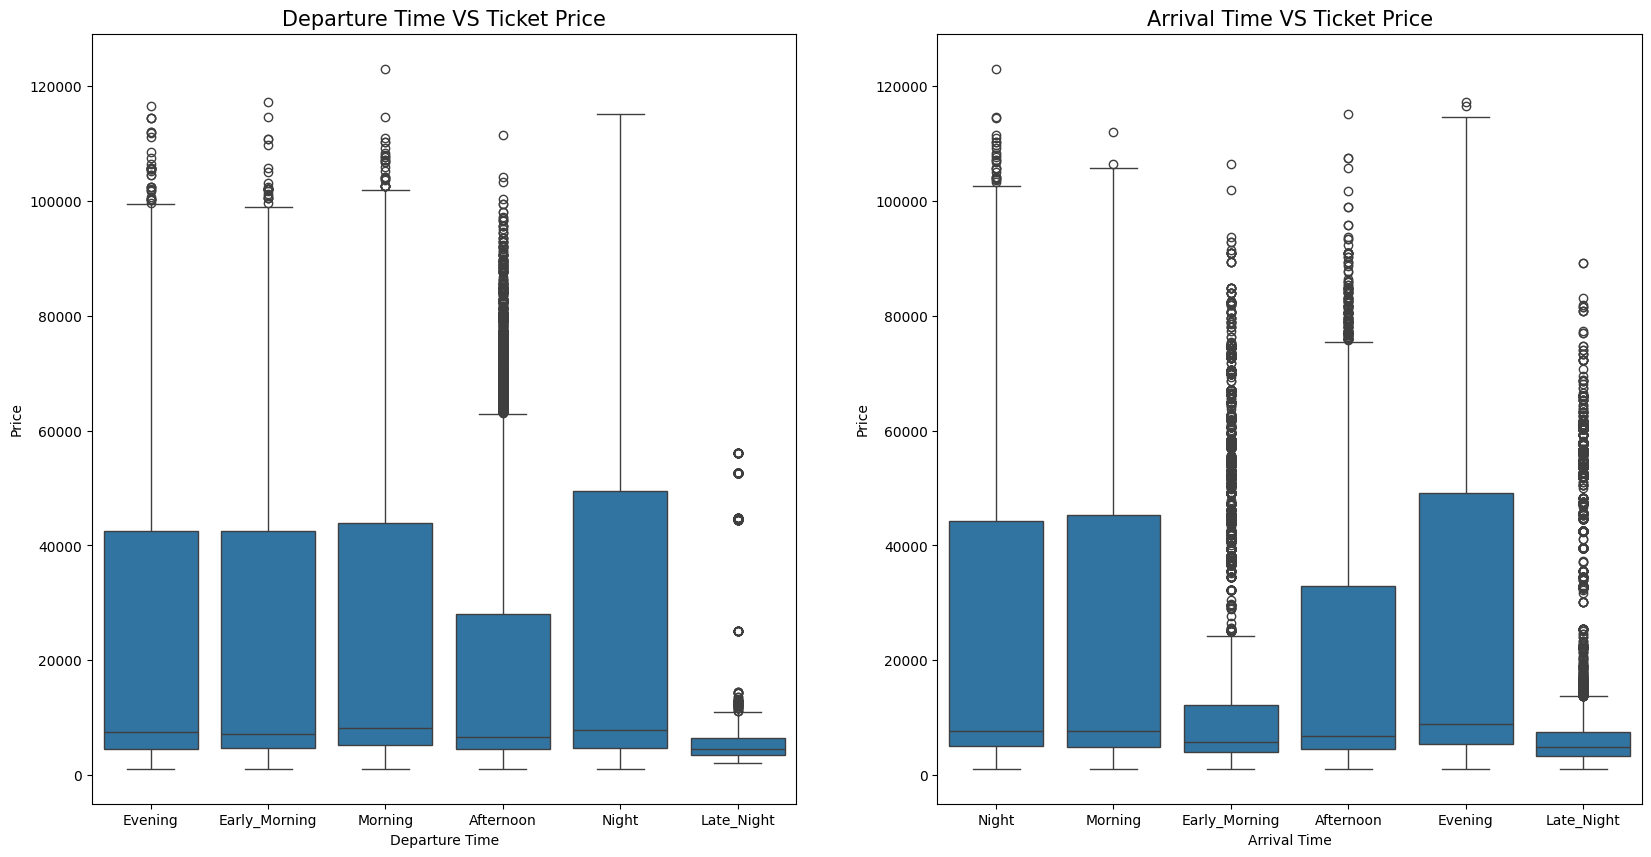

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['departure_time'], y=df['price'])
plt.title('Departure Time VS Ticket Price', fontsize=15)
plt.xlabel('Departure Time', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.subplot(1,2,2)
sns.boxplot(x=df['arrival_time'], y=df['price'])
plt.title('Arrival Time VS Ticket Price', fontsize=15)
plt.xlabel('Arrival Time', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

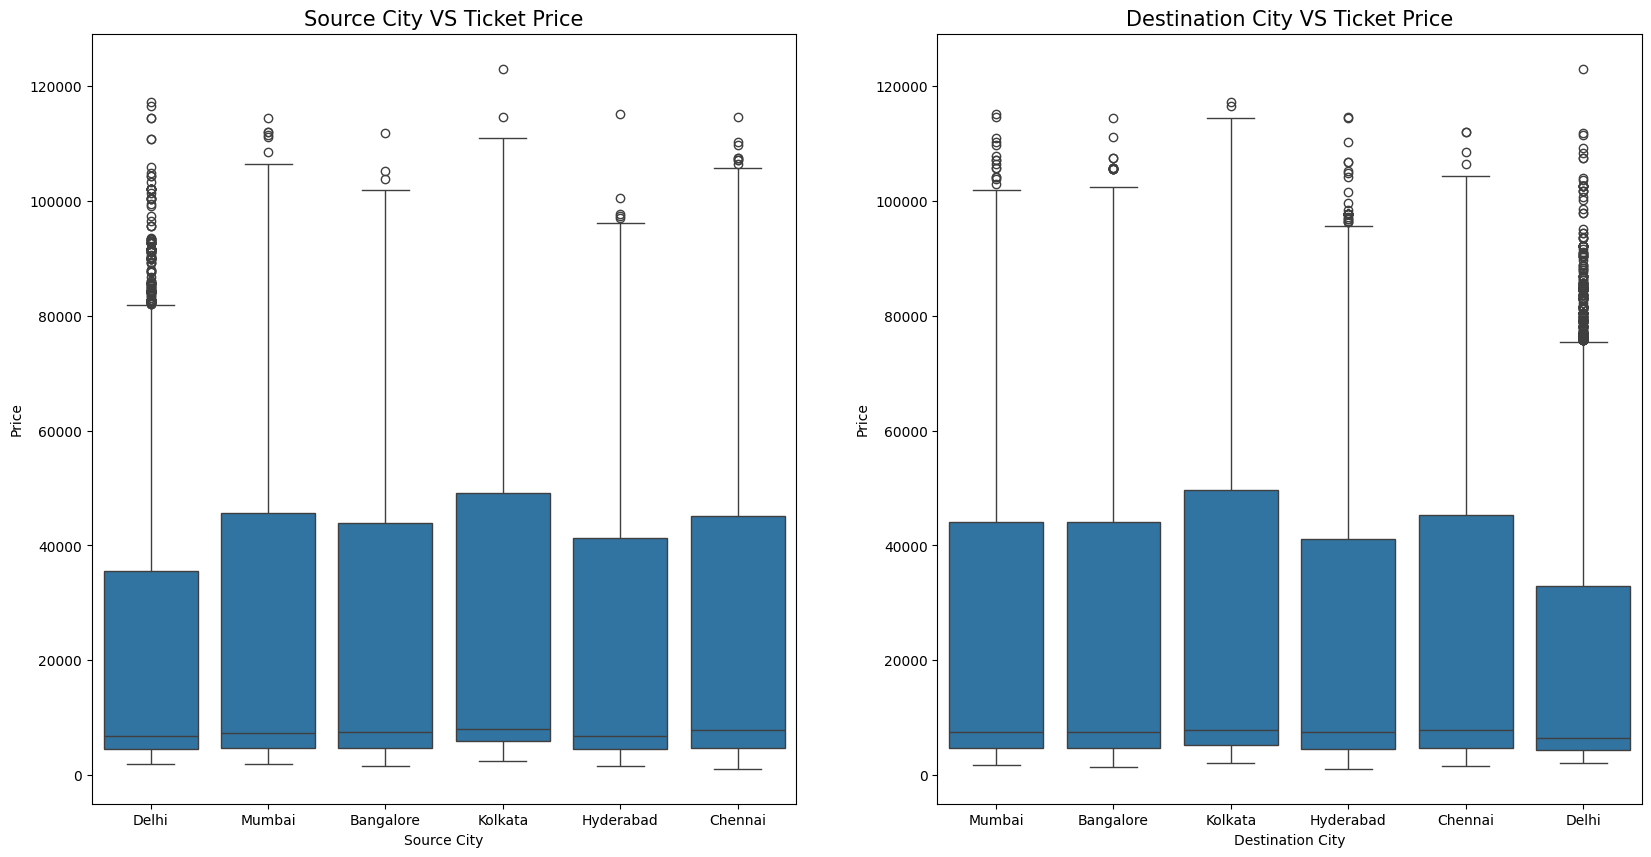

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['source_city'], y=df['price'])
plt.title('Source City VS Ticket Price', fontsize=15)
plt.xlabel('Source City', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.subplot(1,2,2)
sns.boxplot(x=df['destination_city'], y=df['price'])
plt.title('Destination City VS Ticket Price', fontsize=15)
plt.xlabel('Destination City', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

In [23]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]= le.fit_transform(df[col])

In [26]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


## Exporting the cleaned dataset

In [27]:
df.to_csv('Final_data.csv')